# Content
- Data wrangling
- Elbow technique
- k-mean clutering (4 clusters)
- understanding results
- Results

In [1]:
# import lybaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

In [3]:
# import data
path = r'/Users/lennartzeidler/Desktop/Uni/(6) Advances Analytics and Dashboard Design/liquid store sales analysis'
sales = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'prepared_map_data.pkl'))

In [4]:
sales.shape

(12410125, 19)

In [5]:
sales.head()

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,Country,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6,S28865700001,11/09/2015,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38
8,S29339300091,11/30/2015,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",Muscatine,DECANTERS & SPECIALTY PACKAGES,Jim Beam Brands,Laphroaig w/ Whiskey Stones,12,750,19.58,29.37,4,117.48,3.0,0.79
13,S28866900001,11/11/2015,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,1,17.43,1.5,0.40
18,S29134300126,11/18/2015,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",Monona,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.0,1.59
21,S29282800048,11/23/2015,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.0,2.38


### Data wrangling

In [6]:
# create subset containing only numerical values
sales_num = sales[['Pack', 'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)']]

In [7]:
# renaming some columns
sales_num.rename(columns = {'Bottle Volume (ml)': 'Bottle_vol', 'State Bottle Cost': 'Bottle_cost', 'State Bottle Retail': 'Bottle_sale', 'Bottles Sold': 'Bottles_sold', 'Sale (Dollars)': 'Sale', 'Volume Sold (Liters)': 'Volumne_sold'}, inplace = True)

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_32275/1424979297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_num.rename(columns = {'Bottle Volume (ml)': 'Bottle_vol', 'State Bottle Cost': 'Bottle_cost', 'State Bottle Retail': 'Bottle_sale', 'Bottles Sold': 'Bottles_sold', 'Sale (Dollars)': 'Sale', 'Volume Sold (Liters)': 'Volumne_sold'}, inplace = True)


In [8]:
sales_num.head()

,Pack,Bottle_vol,Bottle_cost,Bottle_sale,Bottles_sold,Sale,Volumne_sold
6,6,1500,11.62,17.43,6,104.58,9.0
8,12,750,19.58,29.37,4,117.48,3.0
13,6,1500,11.62,17.43,1,17.43,1.5
18,1,6000,99.00,148.50,1,148.50,6.0
21,6,1500,11.62,17.43,6,104.58,9.0


### Elbow technique

In [9]:
# Define k-means clusters
kmeans = [KMeans(n_clusters=i) for i in range(1, 10)]

In [10]:
# Creates rate of variation score
score = [kmeans[i].fit(sales_num).score(sales_num) for i in range(len(kmeans))] 

score

[-8610982032242.858,
 -5149070353663.162,
 -2773551518782.495,
 -1935603078590.3833,
 -1586446113022.6814,
 -1273655279919.6367,
 -971985120072.4479,
 -781649792559.6512,
 -643103309270.0308]

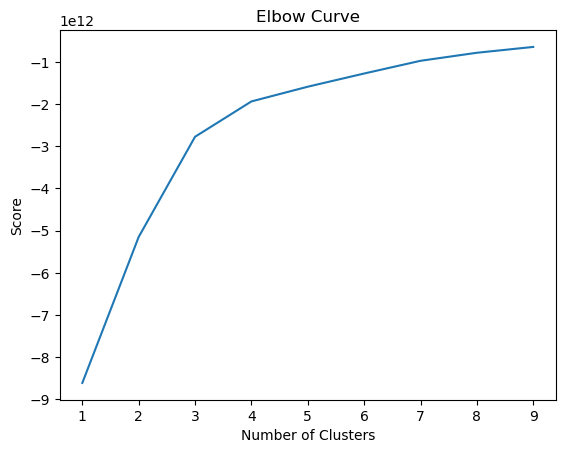

In [11]:
# Ploting the elbow curve

pl.plot(range(1, 10),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

result: I could eather use 3 or 4, but since it really starts flattening at 4 I will use 4. 


### k-mean clutering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(sales_num)

KMeans(n_clusters=4)

In [14]:
# create new column containing cluster group
sales_num['clusters'] = kmeans.fit_predict(sales_num)

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_32275/603832677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_num['clusters'] = kmeans.fit_predict(sales_num)


In [15]:
sales_num.head()

,Pack,Bottle_vol,Bottle_cost,Bottle_sale,Bottles_sold,Sale,Volumne_sold,clusters
6,6,1500,11.62,17.43,6,104.58,9.0,2
8,12,750,19.58,29.37,4,117.48,3.0,0
13,6,1500,11.62,17.43,1,17.43,1.5,2
18,1,6000,99.00,148.50,1,148.50,6.0,2
21,6,1500,11.62,17.43,6,104.58,9.0,2


In [16]:
sales_num['clusters'].value_counts()

0    9817772
2    2576982
3      15341
1         30
Name: clusters, dtype: int64

### understanding results

In [17]:
# first I want to know some basoc stats to see where I want to create visualisations 
sales_num.groupby('clusters').agg({'Pack':['mean', 'median'], 
                         'Bottle_vol':['mean', 'median'], 
                         'Bottle_cost':['mean', 'median'],
                         'Bottle_sale':['mean', 'median'],
                         'Bottles_sold':['mean', 'median'],
                         'Sale':['mean', 'median'],
                         'Volumne_sold':['mean', 'median']})

Pack            Bottle_vol            Bottle_cost           \
               mean median           mean    median         mean   median   
clusters                                                                    
0         13.881531   12.0     704.626496     750.0     9.008951     7.49   
1          1.000000    1.0  340500.000000  378000.0  4054.373333  3537.30   
2          5.881924    6.0    1781.529578    1750.0    12.001081    10.00   
3         11.441236    6.0    1300.011407    1000.0    19.471109    12.59   

          Bottle_sale          Bottles_sold                Sale           \
                 mean   median         mean median         mean   median   
clusters                                                                   
0           13.529833    11.24     7.890309    4.0   103.530866    60.12   
1         6081.560000  5305.95     1.000000    1.0  6081.560000  5305.95   
2           18.048118    15.00     6.738193    6.0   122.956351    83.16   
3           29.282173    18.89   400.835930  300.0  7497.512343  5778.00   

         Volumne_sold          
                 mean  median  
clusters                       
0            5.563838    2.25  
1          340.500000  378.00  
2           11.875194   10.50  
3          514.819359  450.00

Interesting relationships:
- Bottles_sold <==> Volume_sold
- Pack <==> Bottle_vol
- Bottle_cost <==> Volume_sold 

creating sample for visualizations

In [18]:
sampl = sales_num.sample(n=500000, random_state=1)

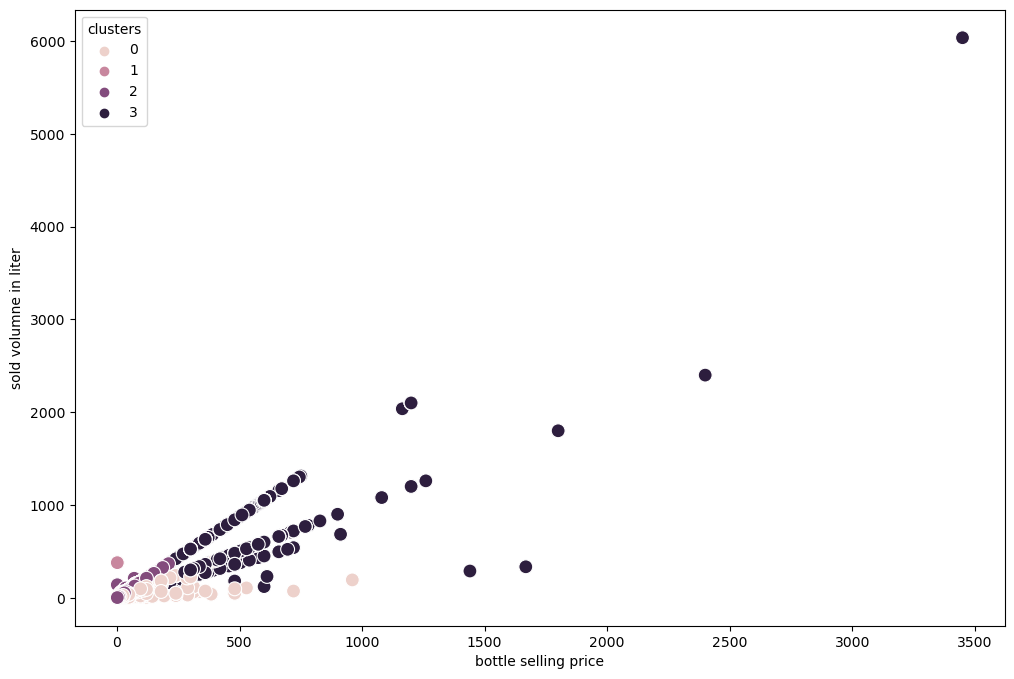

In [19]:
# scatterplot for Bottles_Sold <==> Volume_sold

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sampl['Bottles_sold'], y=sampl['Volumne_sold'], hue=sampl['clusters'], s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('bottle selling price') 
plt.ylabel('sold volumne in liter') 
plt.show()

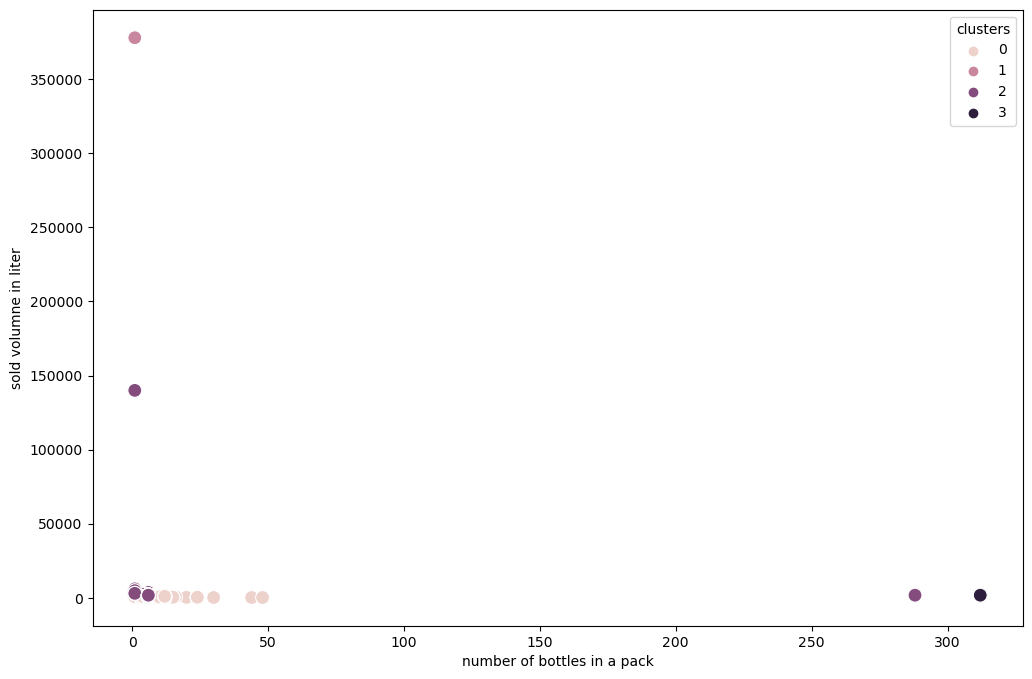

In [20]:
# scatterplot for Pack <==> Bottle_vol

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sampl['Pack'], y=sampl['Bottle_vol'], hue=sampl['clusters'], s=100) 

ax.grid(False) 
plt.xlabel('number of bottles in a pack') 
plt.ylabel('sold volumne in liter') 
plt.show()

In [21]:
# outlier ruin the result so I take them out 
samples_sampl = sampl[sampl['Pack'] < 50]
samples_sampl = samples_sampl[sampl['Bottle_vol'] < 10000]
samples_sampl.shape

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_32275/2183219463.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  samples_sampl = samples_sampl[sampl['Bottle_vol'] < 10000]


(499989, 8)

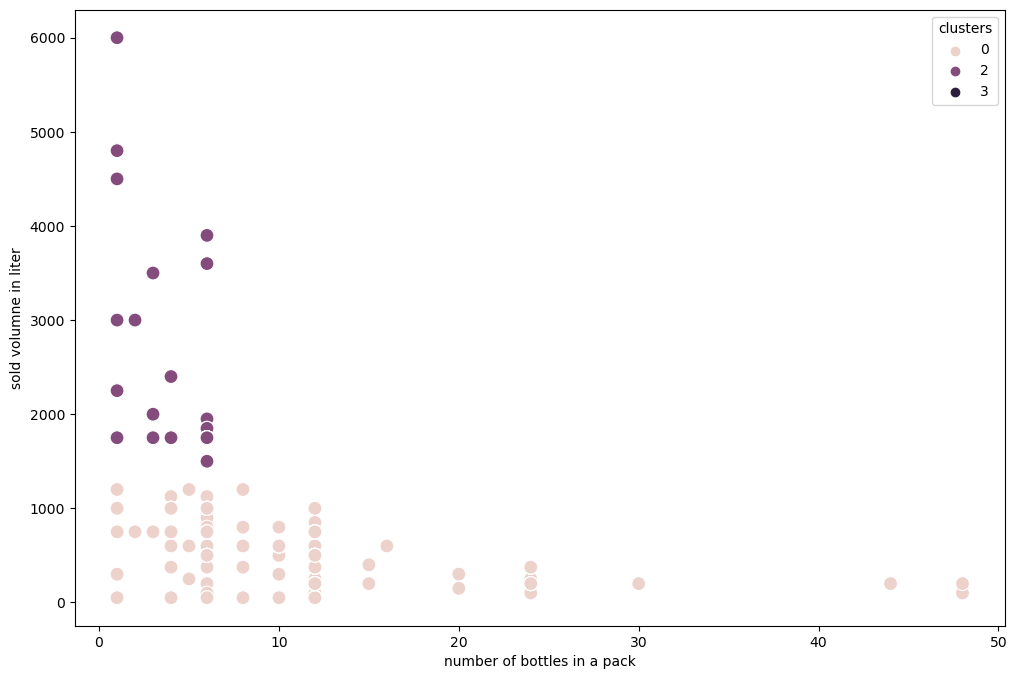

In [22]:
# scatterplot try 2 for Pack <==> Bottle_vol

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=samples_sampl['Pack'], y=samples_sampl['Bottle_vol'], hue=samples_sampl['clusters'], s=100) 

ax.grid(False) 
plt.xlabel('number of bottles in a pack') 
plt.ylabel('sold volumne in liter') 
plt.show()

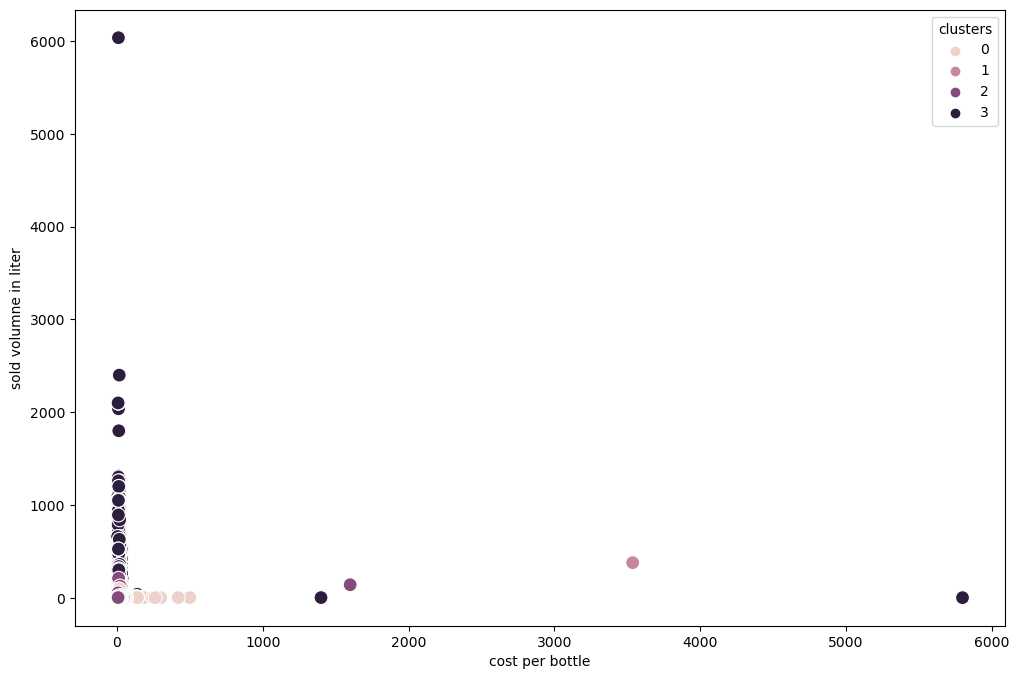

In [23]:
# scatterplot for Bottle_cost <==> Volume_sold 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sampl['Bottle_cost'], y=sampl['Volumne_sold'], hue=sampl['clusters'], s=100) 

ax.grid(False) 
plt.xlabel('cost per bottle') 
plt.ylabel('sold volumne in liter') 
plt.show()

In [24]:
samples_sampl_2 = sampl[sampl['Bottle_cost'] < 1000]
samples_sampl_2 = samples_sampl_2[sampl['Volumne_sold'] < 3000]

/var/folders/zw/37lckzg54ll7byfmgjl5pkw40000gn/T/ipykernel_32275/3699660704.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  samples_sampl_2 = samples_sampl_2[sampl['Volumne_sold'] < 3000]


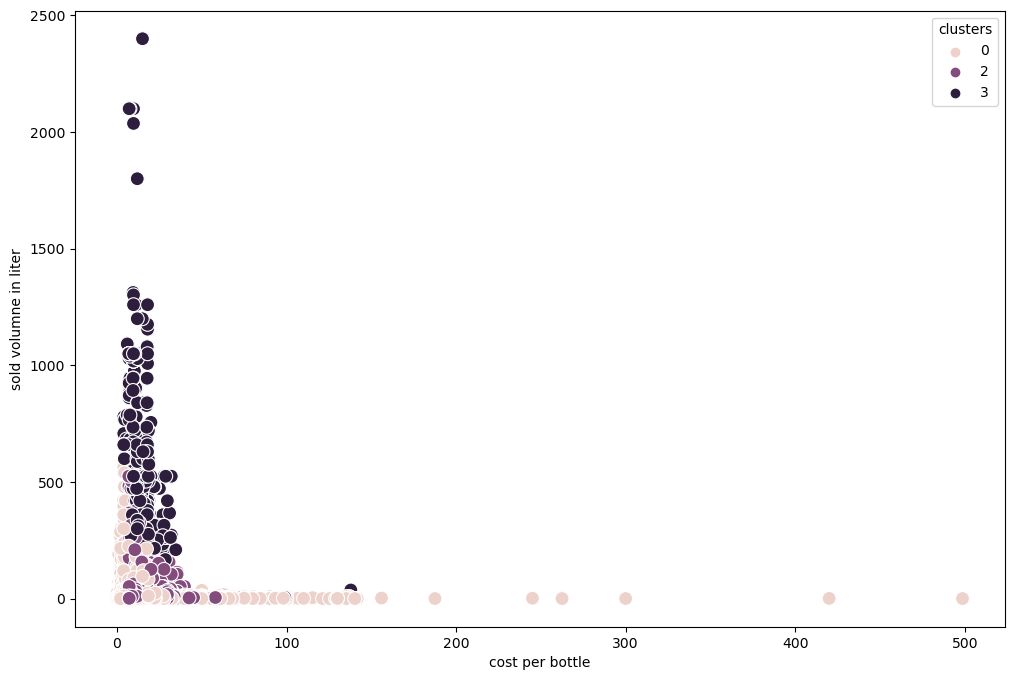

In [25]:
# scatterplot for Bottle_cost <==> Volume_sold 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=samples_sampl_2['Bottle_cost'], y=samples_sampl_2['Volumne_sold'], hue=samples_sampl_2['clusters'], s=100) 

ax.grid(False) 
plt.xlabel('cost per bottle') 
plt.ylabel('sold volumne in liter') 
plt.show()

In [26]:
sales['clusters'] = sales_num['clusters']
clust_2 = sales[sales['clusters'] == 2]
clust_2.head(20)

,Invoice/Item Number,Date,Store Name,Address,City,Zip Code,Store Location,Country,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),clusters
6,S28865700001,11/09/2015,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",Black Hawk,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.00,2.38,2
13,S28866900001,11/11/2015,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,Ida,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,1,17.43,1.50,0.40,2
18,S29134300126,11/18/2015,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",Monona,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.00,1.59,2
21,S29282800048,11/23/2015,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.00,2.38,2
25,S28867000001,11/04/2015,Bancroft Liquor Store,107 N PORTLAND ST PO BX 222,BANCROFT,50517,107 N PORTLAND ST PO BX 222\nBANCROFT 50517\n(...,Kossuth,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,3,52.29,4.50,1.19,2
29,S28865800001,11/09/2015,Hy-Vee Food Store / iowa Falls,HIGHWAY 65 SOUTH,IOWA FALLS,50126,HIGHWAY 65 SOUTH\nIOWA FALLS 50126\n,Hardin,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,6,104.58,9.00,2.38,2
38,S28867100001,11/09/2015,Pit Stop Liquors / Newton,"1324, 1st AVE E",NEWTON,50208,"1324, 1st AVE E\nNEWTON 50208\n(41.699173, -93...",Jasper,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,2,34.86,3.00,0.79,2
50,S29137200001,11/18/2015,Hy-Vee Food Store / Knoxville,813 N LINCOLN STE 1,KNOXVILLE,50138,813 N LINCOLN STE 1\nKNOXVILLE 50138\n(41.3254...,Marion,DECANTERS & SPECIALTY PACKAGES,Duggan's Distillers Products Corp,Forbidden Secret Coffee Pack,6,1500,11.62,17.43,12,209.16,18.00,4.76,2
52,S29161800004,11/18/2015,Hy-Vee Food Store / Iowa City,1125 N DODGE ST,IOWA CITY,52240,"1125 N DODGE ST\nIOWA CITY 52240\n(41.676203, ...",Johnson,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.00,1.59,2
53,S29082800001,11/16/2015,Hy-Vee Food Store / Muscatine,2400 2ND AVE,MUSCATINE,52761,"2400 2ND AVE\nMUSCATINE 52761\n(41.45135, -91....",Muscatine,CREAM LIQUEURS,MHW Ltd,"Rumchata ""GoChatas""",1,6000,99.00,148.50,1,148.50,6.00,1.59,2


limit_output extension: Maximum message size of 10000 exceeded with 12865 characters

In [27]:
sales.to_csv(os.path.join(path, '02 Data','Prepared Data', 'final_data.csv'))

### Results
I can shurely say cluster 2 are high price range products, its most often the same product: 18 cases Smirnoff 1.75L/18 cases Captain 1.75L  
Cluster 1 has a higher selling price than Cluster 2 compared to there bottle volume.  

In general I would say Cluster one and two are standart quality product-/sales  
Cluster 2 are High quality product-/sales  
Cluster 3 are Luxury quality product-/sales  
This gives us big insight into our data and helps us categorising our data. Based on this I coud conduct spatial analysis